<a href="https://colab.research.google.com/github/ai-pallikoodam/pytorch-home/blob/main/01_Exer_Vision_Train.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install -Uqq torch timm fastai  

In [ ]:
from fastai.vision.all import *
import timm

In [ ]:
path = untar_data(URLs.PETS)/'images'

In [ ]:
dls = ImageDataLoaders.from_name_func('.',
      get_image_files(path), valid_pct=0.2, seed=42,
      label_func=RegexLabeller(pat = r'^([^/]+)_\d+'),
      item_tfms=Resize(224))

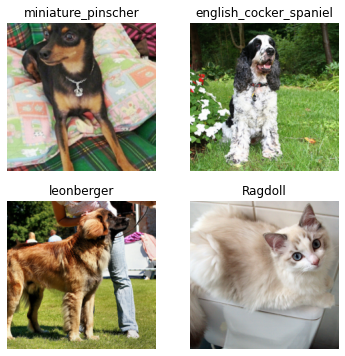

In [ ]:
dls.show_batch(max_n=4)

In [ ]:
timm.list_models('convnext*')

['convnext_base',
 'convnext_base_384_in22ft1k',
 'convnext_base_in22ft1k',
 'convnext_base_in22k',
 'convnext_large',
 'convnext_large_384_in22ft1k',
 'convnext_large_in22ft1k',
 'convnext_large_in22k',
 'convnext_nano',
 'convnext_nano_hnf',
 'convnext_nano_ols',
 'convnext_small',
 'convnext_small_384_in22ft1k',
 'convnext_small_in22ft1k',
 'convnext_small_in22k',
 'convnext_tiny',
 'convnext_tiny_384_in22ft1k',
 'convnext_tiny_hnf',
 'convnext_tiny_in22ft1k',
 'convnext_tiny_in22k',
 'convnext_xlarge_384_in22ft1k',
 'convnext_xlarge_in22ft1k',
 'convnext_xlarge_in22k']

In [ ]:
learn = vision_learner(dls, 'convnext_tiny_in22k', metrics=error_rate).to_fp16()
learn.fine_tune(3)

Downloading: "https://dl.fbaipublicfiles.com/convnext/convnext_tiny_22k_224.pth" to /root/.cache/torch/hub/checkpoints/convnext_tiny_22k_224.pth


epoch,train_loss,valid_loss,error_rate,time
0,1.071970,0.260339,0.089310,00:58


epoch,train_loss,valid_loss,error_rate,time
0,0.292940,0.201108,0.061570,00:54
1,0.206060,0.167877,0.048038,00:54
2,0.127556,0.154627,0.043978,00:55


In [ ]:
learn.export('model.pkl')